In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('NYC_subway_traffic_2017-2021.csv')
data.head()

,Unique ID,Datetime,Stop Name,Remote Unit,Line,Connecting Lines,Daytime Routes,North Direction Label,South Direction Label,Division,Structure,Borough,Neighborhood,Latitude,Longitude,Entries,Exits
0,1,2017-02-04 04:00:00,103 St,R180,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.790600,-73.947478,403.0,222.0
1,2,2017-02-04 04:00:00,103 St,R191,Broadway - 7Av,1,1,Uptown Bronx,Downtown,IRT,Subway,M,Upper West Side,40.799446,-73.968379,119.0,145.0
2,3,2017-02-04 04:00:00,103 St,R314,8th Av - Fulton St,BC,BC,Uptown Bronx,Downtown Brooklyn,IND,Subway,M,Upper West Side,40.796092,-73.961454,55.0,81.0
3,10,2017-02-04 04:00:00,111 St,R355,Liberty Av,A,A,Manhattan,Lefferts Blvd,IND,Elevated,Q,South Ozone Park/Howard Beach,40.684331,-73.832163,156.0,30.0
4,11,2017-02-04 04:00:00,116 St,R182,Lexington Av,6,6,Uptown Bronx,Downtown,IRT,Subway,M,East Harlem,40.798629,-73.941617,495.0,303.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4589380 entries, 0 to 4589379
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unique ID              int64  
 1   Datetime               object 
 2   Stop Name              object 
 3   Remote Unit            object 
 4   Line                   object 
 5   Connecting Lines       object 
 6   Daytime Routes         object 
 7   North Direction Label  object 
 8   South Direction Label  object 
 9   Division               object 
 10  Structure              object 
 11  Borough                object 
 12  Neighborhood           object 
 13  Latitude               float64
 14  Longitude              float64
 15  Entries                float64
 16  Exits                  float64
dtypes: float64(4), int64(1), object(12)
memory usage: 595.2+ MB


In [ ]:
data['Stop Name'].unique()

array(['103 St', '111 St', '116 St', '116 St - Columbia University',
       '125 St', '135 St', '137 St - City College', '14 St',
       '14 St - Union Sq', '155 St', '157 St', '163 St - Amsterdam Av',
       '170 St', '174 St', '18 Av', '181 St', '20 Av', '21 St', '219 St',
       '225 St', '23 St', '233 St', '238 St', '25 Av', '28 St',
       '3 Av - 138 St', '33 St', '36 St',
       '42 St - Port Authority Bus Terminal', '46 St', '5 Av/53 St',
       '5 Av/59 St', '52 St', '57 St', '62 St', '65 St',
       '66 St - Lincoln Center', '68 St - Hunter College', '69 St',
       '7 Av', '72 St', '77 St', '79 St', '8 Av', '80 St',
       '81 St - Museum of Natural History', '86 St', '88 St', '9 Av',
       '96 St', 'Alabama Av', 'Allerton Av', 'Aqueduct - N Conduit Av',
       'Astor Pl', 'Avenue I', 'Avenue N', 'Avenue U', 'Bay 50 St',
       'Bay Pkwy', 'Baychester Av', 'Beach 105 St', 'Beach 90 St',
       'Beach 98 St', 'Bedford Park Blvd', 'Bergen St', 'Botanic Garden',
       'Broad 

In [ ]:
grouped_data = data.groupby('Stop Name').agg({'Entries': 'sum', 'Exits': 'sum'})

In [ ]:
grouped_data['Total Traffic'] = grouped_data['Entries'] + grouped_data['Exits']

In [ ]:
top_5_stops = grouped_data.sort_values(by='Total Traffic', ascending=False).head(5)

In [ ]:
print("Top 5 Stops by Total Traffic:")
print(top_5_stops)

Top 5 Stops by Total Traffic:
                           Entries        Exits  Total Traffic
Stop Name                                                     
Grand Central - 42 St  143200662.0  133988497.0    277189159.0
34 St - Penn Station   134121574.0  130946378.0    265067952.0
86 St                  118626419.0  104025063.0    222651482.0
14 St - Union Sq       112043823.0  103320244.0    215364067.0
23 St                  117018996.0   88402801.0    205421797.0


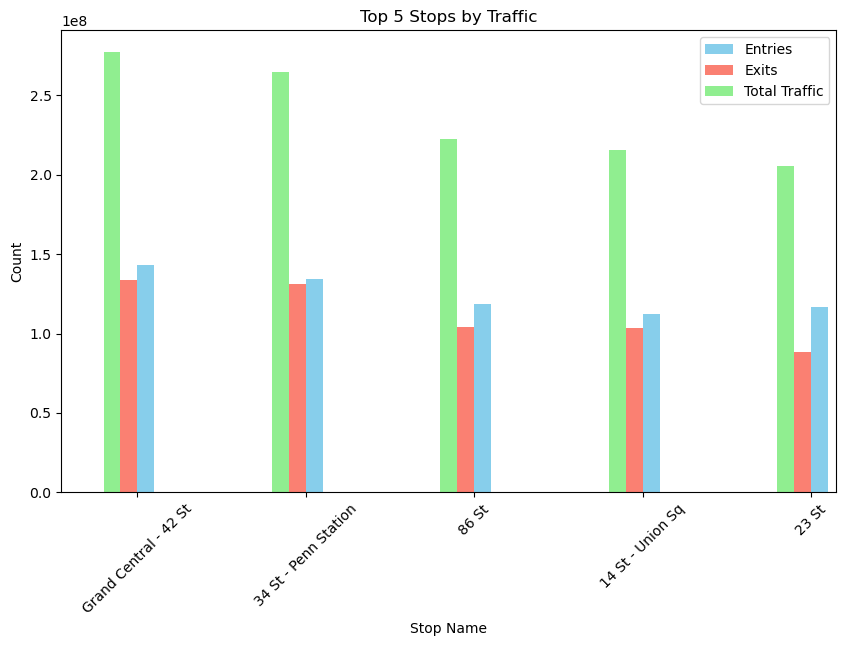

In [ ]:
plt.figure(figsize=(10, 6))

top_5_stops['Entries'].plot(kind='bar', color='skyblue', position=0, width=0.1, label='Entries')

top_5_stops['Exits'].plot(kind='bar', color='salmon', position=1, width=0.1, label='Exits')

top_5_stops['Total Traffic'].plot(kind='bar', color='lightgreen', position=2, width=0.1, label='Total Traffic')

plt.title('Top 5 Stops by Traffic')
plt.xlabel('Stop Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


From above, the station "Grand Central - 42 St" has the maxium traffic including "Entries" and "Exits"